In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aayushivt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/aayushivt/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/aayushivt/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
#Read data
df = pd.read_excel("/home/aayushivt/Master_thesis/finalized_data.xlsx")
print(df.shape)
#df = df.head(500)
#print(df.shape)
df

(14572, 8)


,Id,user_id,ship_id,datetime,score,feedback,feedback_english,cleaned_feedback
0,1,55284,0,2022-06-07 09:00:00,1,I paid for it and it doesnâ€™t work.,I paid for it and it doesnâ€™t work.,I paid for it and it doesnt work
1,2,55318,1,6/7/2022 12:55,1,DÃ¥rlig dekkning!,Bad coverage!,Bad coverage
2,3,55341,2,6/7/2022 14:56,1,Voucher code doesnâ€™t seem to work,Voucher code doesnâ€™t seem to work,Voucher code doesnt seem to work
3,4,55342,2,6/7/2022 14:57,1,"No free WiFi available in cabins, unable to bu...","No free WiFi available in cabins, unable to bu...",No free WiFi available in cabins unable to buy...
4,5,55347,3,6/7/2022 11:51,3,Ja,Yes,Yes
...,...,...,...,...,...,...,...,...
14567,14568,173593,2,12/6/2023 16:57,1,Barco sin internet,Boat without internet,Boat without internet
14568,14569,173595,34,12/6/2023 17:04,1,No hay conexion de velocidad mÃ­nima gratisðŸ‘...,There is no free minimum speed connectionðŸ‘ŽðŸ»,There is no free minimum speed connection
14569,14570,173639,1,12/7/2023 0:20,1,FÃ¥r communication failure...,FÃ¥r communication failure...,Fr communication failure
14570,14571,173641,7,12/7/2023 2:40,1,"Payed 2 eur , but wifi not worked .","Payed 2 eur , but wifi not worked .",Payed 2 eur but wifi not worked


In [15]:
#df.head()

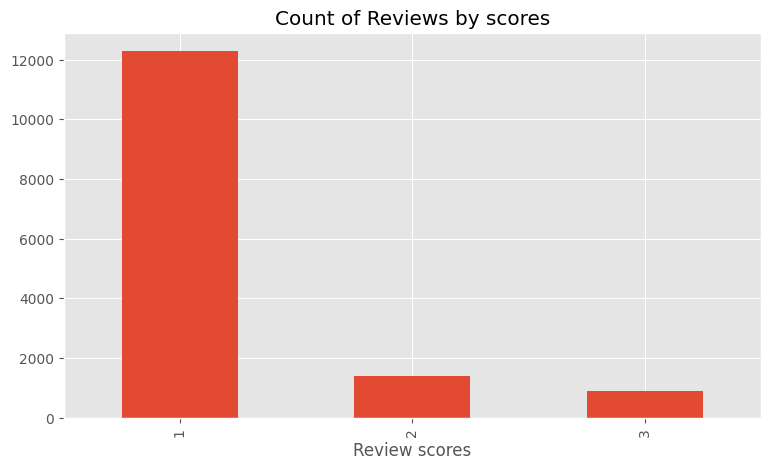

In [4]:
#visualization

ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by scores',
          figsize=(9, 5))
ax.set_xlabel('Review scores')
plt.show()

In [17]:
example = df['cleaned_feedback'][3]
print(example)

No free WiFi available in cabins unable to buy premium WiFi as will not accept any card for payment


In [18]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['No',
 'free',
 'WiFi',
 'available',
 'in',
 'cabins',
 'unable',
 'to',
 'buy',
 'premium']

In [19]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('No', 'DT'),
 ('free', 'JJ'),
 ('WiFi', 'NNP'),
 ('available', 'JJ'),
 ('in', 'IN'),
 ('cabins', 'NNS'),
 ('unable', 'JJ'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('premium', 'JJ')]

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  No/DT
  free/JJ
  (ORGANIZATION WiFi/NNP)
  available/JJ
  in/IN
  cabins/NNS
  unable/JJ
  to/TO
  buy/VB
  premium/JJ
  (ORGANIZATION WiFi/NNP)
  as/IN
  will/MD
  not/RB
  accept/VB
  any/DT
  card/NN
  for/IN
  payment/NN)


In [ ]:
##Step 1. VADER Seniment Score #This uses a "bag of words" approach #Stop words are removed
#each word is scored and combined to a total score

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/aayushivt/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sia = SentimentIntensityAnalyzer()

In [26]:
sia.polarity_scores('My network is perfect!')

{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6114}

In [24]:
sia.polarity_scores('This is the worst wifi ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)

{'neg': 0.185, 'neu': 0.676, 'pos': 0.139, 'compound': -0.0217}

In [14]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_feedback']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/14572 [00:00<?, ?it/s]

In [27]:
res

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.185, 'neu': 0.676, 'pos': 0.139, 'compound': -0.0217},
 5: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019},
 6: {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106},
 7: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106},
 8: {'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.34},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.338, 'neu': 0.154, 'pos': 0.508, 'compound': 0.2732},
 14: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compo

In [37]:
vaders= pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,1.000,0.000,0.0000
2,0.778,0.222,0.000,-0.5423
3,0.000,1.000,0.000,0.0000
4,0.185,0.676,0.139,-0.0217
5,0.000,0.000,1.000,0.4019
...,...,...,...,...
14568,0.000,1.000,0.000,0.0000
14569,0.210,0.476,0.314,0.2732
14570,0.623,0.377,0.000,-0.5106
14571,0.000,1.000,0.000,0.0000


In [38]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,user_id,ship_id,datetime,score,feedback,feedback_english,cleaned_feedback
0,1,0.000,1.000,0.000,0.0000,55284,0,2022-06-07 09:00:00,1,I paid for it and it doesnâ€™t work.,I paid for it and it doesnâ€™t work.,I paid for it and it doesnt work
1,2,0.778,0.222,0.000,-0.5423,55318,1,6/7/2022 12:55,1,DÃ¥rlig dekkning!,Bad coverage!,Bad coverage
2,3,0.000,1.000,0.000,0.0000,55341,2,6/7/2022 14:56,1,Voucher code doesnâ€™t seem to work,Voucher code doesnâ€™t seem to work,Voucher code doesnt seem to work
3,4,0.185,0.676,0.139,-0.0217,55342,2,6/7/2022 14:57,1,"No free WiFi available in cabins, unable to bu...","No free WiFi available in cabins, unable to bu...",No free WiFi available in cabins unable to buy...
4,5,0.000,0.000,1.000,0.4019,55347,3,6/7/2022 11:51,3,Ja,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14567,14568,0.000,1.000,0.000,0.0000,173593,2,12/6/2023 16:57,1,Barco sin internet,Boat without internet,Boat without internet
14568,14569,0.210,0.476,0.314,0.2732,173595,34,12/6/2023 17:04,1,No hay conexion de velocidad mÃ­nima gratisðŸ‘...,There is no free minimum speed connectionðŸ‘ŽðŸ»,There is no free minimum speed connection
14569,14570,0.623,0.377,0.000,-0.5106,173639,1,12/7/2023 0:20,1,FÃ¥r communication failure...,FÃ¥r communication failure...,Fr communication failure
14570,14571,0.000,1.000,0.000,0.0000,173641,7,12/7/2023 2:40,1,"Payed 2 eur , but wifi not worked .","Payed 2 eur , but wifi not worked .",Payed 2 eur but wifi not worked


In [39]:
#sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,user_id,ship_id,datetime,score,feedback,feedback_english,cleaned_feedback
0,1,0.000,1.000,0.000,0.0000,55284,0,2022-06-07 09:00:00,1,I paid for it and it doesnâ€™t work.,I paid for it and it doesnâ€™t work.,I paid for it and it doesnt work
1,2,0.778,0.222,0.000,-0.5423,55318,1,6/7/2022 12:55,1,DÃ¥rlig dekkning!,Bad coverage!,Bad coverage
2,3,0.000,1.000,0.000,0.0000,55341,2,6/7/2022 14:56,1,Voucher code doesnâ€™t seem to work,Voucher code doesnâ€™t seem to work,Voucher code doesnt seem to work
3,4,0.185,0.676,0.139,-0.0217,55342,2,6/7/2022 14:57,1,"No free WiFi available in cabins, unable to bu...","No free WiFi available in cabins, unable to bu...",No free WiFi available in cabins unable to buy...
4,5,0.000,0.000,1.000,0.4019,55347,3,6/7/2022 11:51,3,Ja,Yes,Yes


Plot Vader results

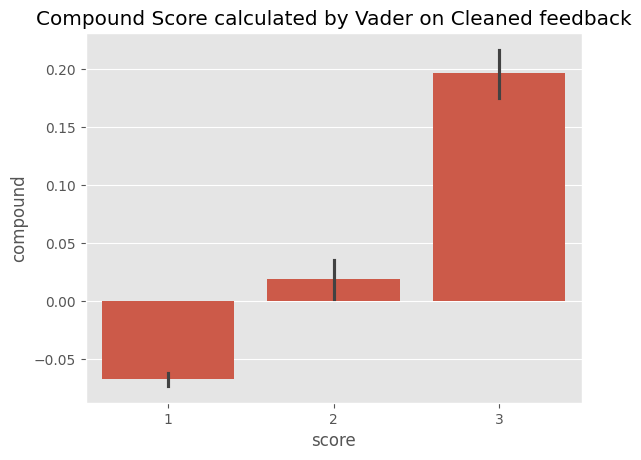

In [41]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compound Score calculated by Vader on Cleaned feedback')
plt.show()

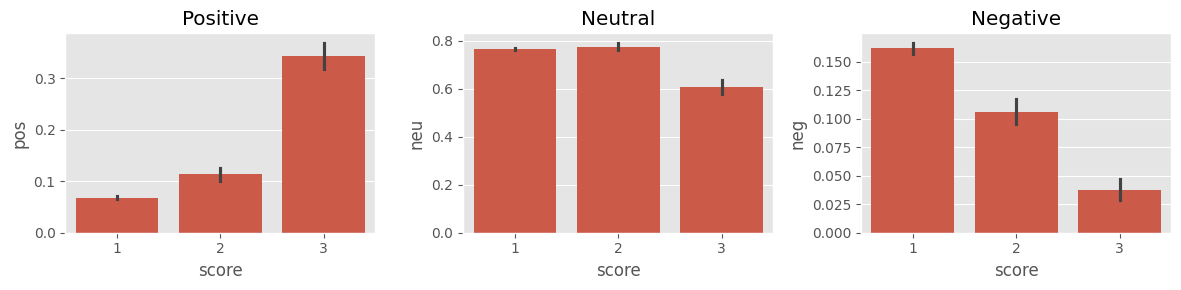

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

ROBERTA

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/home/aayushivt/.local/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [48]:
print(example)
sia.polarity_scores(example)

No free WiFi available in cabins unable to buy premium WiFi as will not accept any card for payment


{'neg': 0.185, 'neu': 0.676, 'pos': 0.139, 'compound': -0.0217}

In [50]:
encoded_text= tokenizer(example, return_tensors='pt')

In [51]:
output=model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.9201,  0.4123, -2.5089]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [52]:
scores=output[0][0].detach().numpy()
scores= softmax(scores)
scores

array([0.81080484, 0.1795245 , 0.0096707 ], dtype=float32)

In [55]:
scores_dict={
    'roberta_neg':scores[0],
'roberta_neu':scores[1],
'roberta_pos':scores[2]
}
scores_dict

{'roberta_neg': 0.81080484,
 'roberta_neu': 0.1795245,
 'roberta_pos': 0.009670698}

In [56]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [57]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['cleaned_feedback']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/14572 [00:00<?, ?it/s]

In [58]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [59]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'user_id', 'ship_id',
       'datetime', 'score', 'feedback', 'feedback_english',
       'cleaned_feedback'],
      dtype='object')

In [60]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,user_id,ship_id,datetime,score,feedback,feedback_english,cleaned_feedback
0,1,0.000,1.000,0.000,0.0000,0.931039,0.064060,0.004901,55284,0,2022-06-07 09:00:00,1,I paid for it and it doesnâ€™t work.,I paid for it and it doesnâ€™t work.,I paid for it and it doesnt work
1,2,0.778,0.222,0.000,-0.5423,0.813527,0.170579,0.015894,55318,1,6/7/2022 12:55,1,DÃ¥rlig dekkning!,Bad coverage!,Bad coverage
2,3,0.000,1.000,0.000,0.0000,0.907705,0.087170,0.005125,55341,2,6/7/2022 14:56,1,Voucher code doesnâ€™t seem to work,Voucher code doesnâ€™t seem to work,Voucher code doesnt seem to work
3,4,0.185,0.676,0.139,-0.0217,0.810805,0.179524,0.009671,55342,2,6/7/2022 14:57,1,"No free WiFi available in cabins, unable to bu...","No free WiFi available in cabins, unable to bu...",No free WiFi available in cabins unable to buy...
4,5,0.000,0.000,1.000,0.4019,0.125711,0.473165,0.401124,55347,3,6/7/2022 11:51,3,Ja,Yes,Yes


Comparing the Roberta and vader scores 

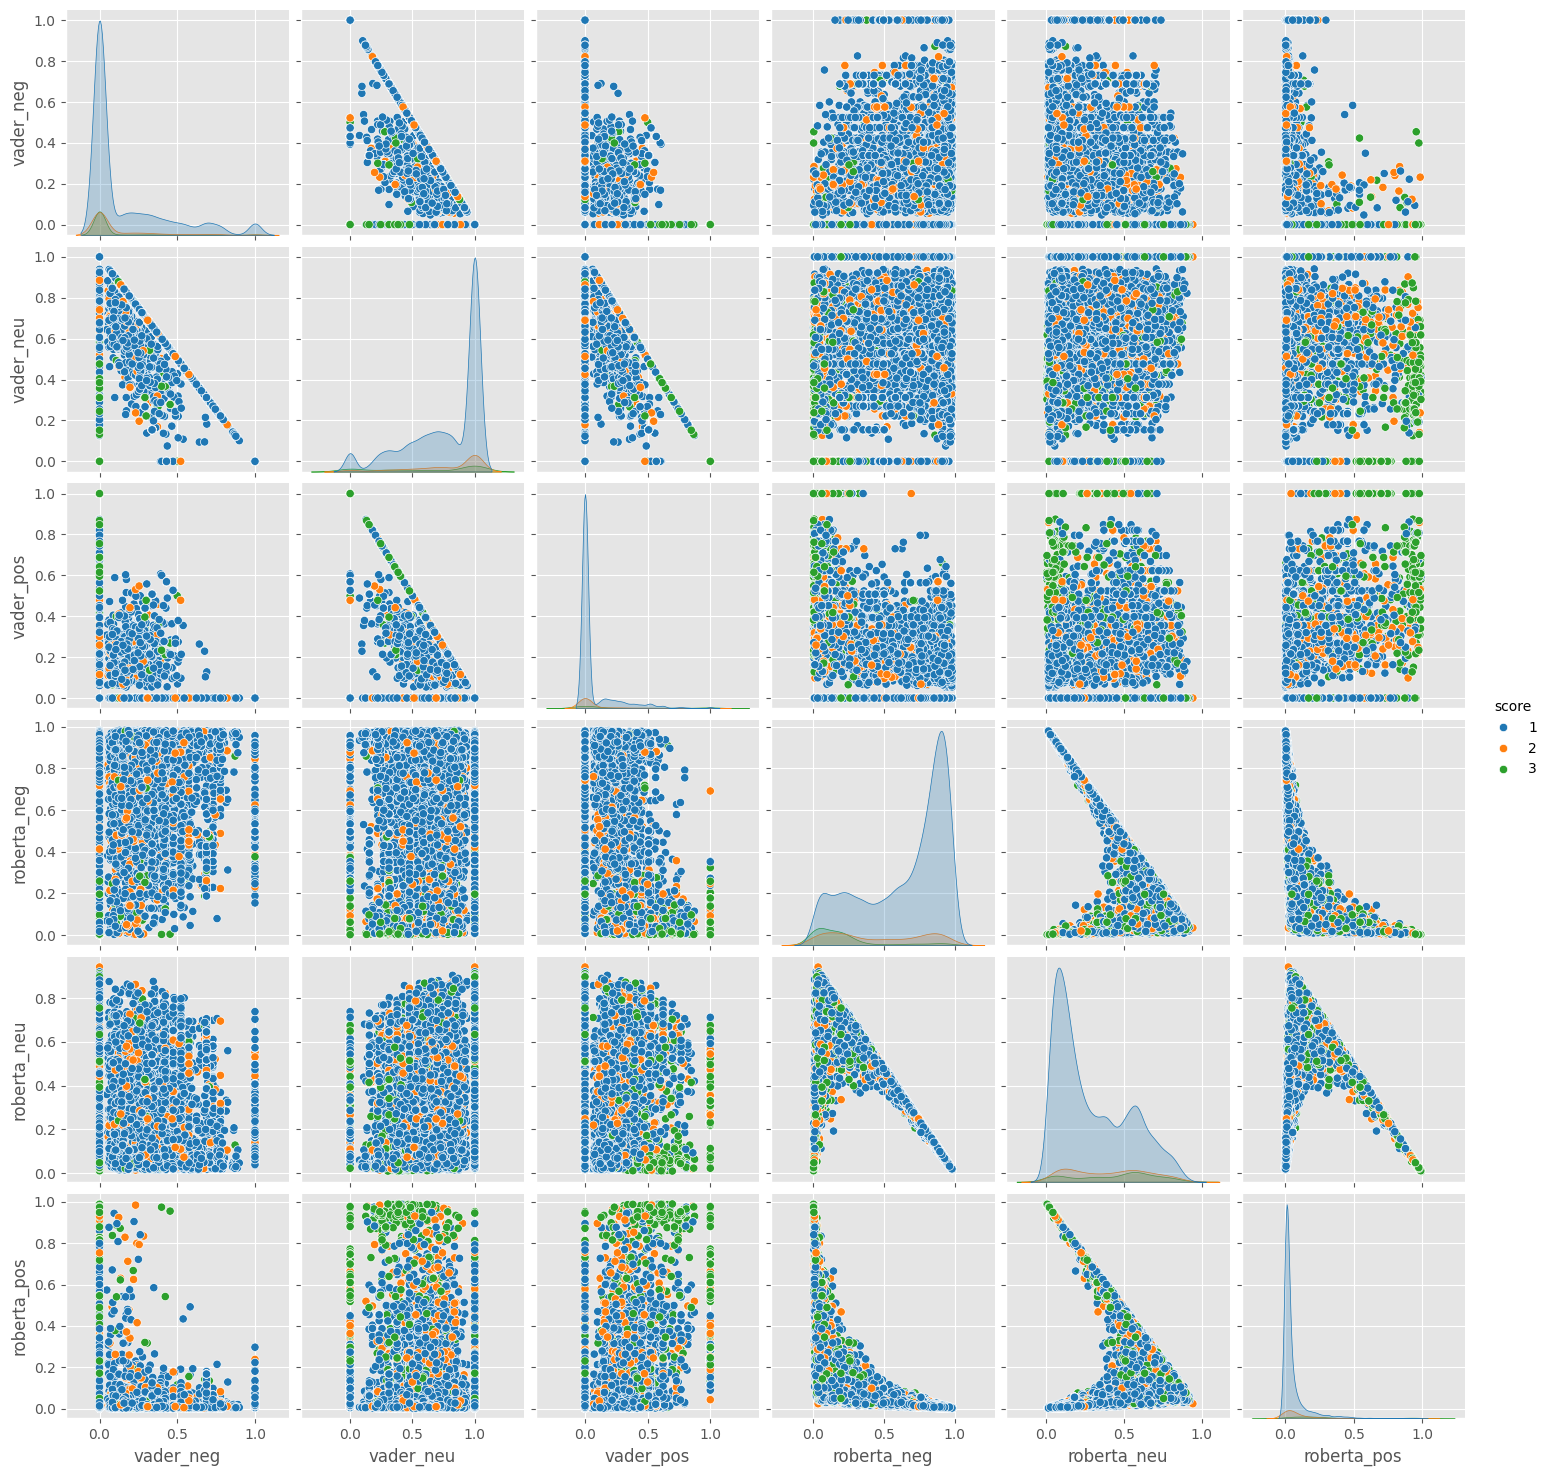

In [61]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='score',
            palette='tab10')
plt.show()

In [63]:
results_df.query('score == 1') \
    .sort_values('roberta_pos', ascending=False)['cleaned_feedback'].values[0]

'Its sooooo good'

In [64]:
results_df.query('score == 1') \
    .sort_values('vader_pos', ascending=False)['cleaned_feedback'].values[0]

'Help'

In [65]:
results_df.query('score == 3') \
    .sort_values('roberta_neg', ascending=False)['cleaned_feedback'].values[0]

'Got this website nothing works and Im having anger issues'

In [66]:
results_df.query('score == 3') \
    .sort_values('vader_neg', ascending=False)['cleaned_feedback'].values[0]

'NO'

In [67]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

2024-04-05 10:05:50.493421: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 10:05:51.262308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 10:05:51.262360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 10:05:51.266898: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-05 10:05:51.591845: I tensorflow/core/platform/cpu_feature_g

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [68]:
sent_pipeline('No free WiFi available in cabins unable to buy...')

[{'label': 'NEGATIVE', 'score': 0.9994798302650452}]